## **Dataset Characteristics 4 Additional Features**

In this Jupyter notebook, we investigate additional features which might be worth being implemented.

These features are

1. *Ferientage*
2. *Niederschlag*
3. *Season*
4. *Temperaturabweichung*





### **1.0 - Import the file**

In [5]:
# Import the necessary libaries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import logging
import missingno as msno
import seaborn as sns

# Read the file and check it out
url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/5_has_wettercode.csv'
# data = "/workspaces/bakery_sales_prediction/sourcedata/cleaned_data/7_transformed_variables.csv"

# Read the file and check it out
#df = pd.read_csv(url)
df = pd.read_csv(url)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009 entries, 0 to 7008
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Datum                7009 non-null   object 
 1   Bewoelkung           7009 non-null   float64
 2   Temperatur           7009 non-null   float64
 3   Windgeschwindigkeit  7009 non-null   float64
 4   Wettercode           7009 non-null   float64
 5   KielerWoche          7009 non-null   float64
 6   Warengruppe          7009 non-null   float64
 7   Umsatz               7009 non-null   float64
 8   Feiertage            7009 non-null   float64
 9   Ferientage           7009 non-null   float64
dtypes: float64(9), object(1)
memory usage: 547.7+ KB


,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Warengruppe,Umsatz,Feiertage,Ferientage
0,2013-07-01,6.0,17.8375,15.0,20.0,0.0,1.0,148.828353,0.0,1.0
1,2013-07-01,6.0,17.8375,15.0,20.0,0.0,2.0,535.856285,0.0,1.0
2,2013-07-01,6.0,17.8375,15.0,20.0,0.0,3.0,201.198426,0.0,1.0
3,2013-07-01,6.0,17.8375,15.0,20.0,0.0,4.0,65.890169,0.0,1.0
4,2013-07-01,6.0,17.8375,15.0,20.0,0.0,5.0,317.475875,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
7004,2018-07-30,6.0,27.7875,10.0,21.0,0.0,1.0,148.541340,0.0,1.0
7005,2018-07-30,6.0,27.7875,10.0,21.0,0.0,2.0,616.358562,0.0,1.0
7006,2018-07-30,6.0,27.7875,10.0,21.0,0.0,3.0,348.770346,0.0,1.0
7007,2018-07-30,6.0,27.7875,10.0,21.0,0.0,4.0,71.822977,0.0,1.0


### **1.1 - Creation of a bar chart: representation of the correlation of average sales per weekday (sorted from Monday to Sunday inclusive) and adding the confidence intervals of sales per weekday (using standard deviation of sales per weekday)**

To analyse the dataset only for each 'Warengruppe', we uses a bar chart with confidence intervals to display the relationship between the  
average sales per day of the week. The days of the week in the chart are sorted from Monday to Sunday.

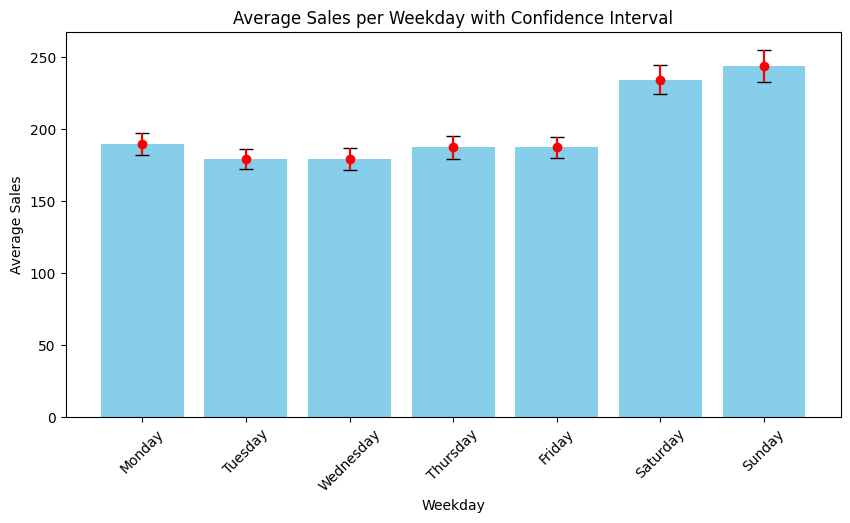

In [6]:
# Convert 'Datum' column to datetime format
df['Datum'] = pd.to_datetime(df['Datum'])

# Extract weekday from 'Datum' column
df['weekday'] = df['Datum'].dt.weekday

# Calculate average sales per weekday
avg_sales_per_weekday = df.groupby('weekday')['Umsatz'].mean()

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])

# Calculate confidence interval
ci = 1.96 * df.groupby('weekday')['Umsatz'].std() / np.sqrt(df.groupby('weekday')['Umsatz'].count())

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation = 45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
plt.title('Average Sales per Weekday with Confidence Interval')
plt.show()
logging.info(avg_sales_per_weekday)

### **1.2 - Creation of a bar chart for feature "Ferientage"**

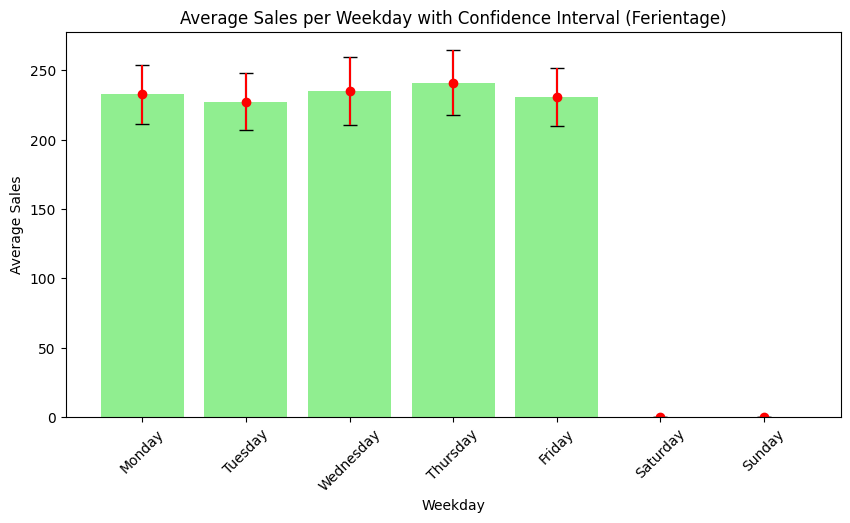

In [7]:
# Filtering data for 'Ferientage' period
df_ferientage = df[df['Ferientage'] == 1]

# Calculate average sales per weekday for 'Ferientage' period
avg_sales_per_weekday_ferientage = df_ferientage.groupby('weekday')['Umsatz'].mean()

# Ensure all weekdays are present
avg_sales_per_weekday_ferientage = avg_sales_per_weekday_ferientage.reindex([0, 1, 2, 3, 4, 5, 6], fill_value=0)

# Calculate confidence interval for 'Ferientage' period
ci_ferientage = 1.96 * df_ferientage.groupby('weekday')['Umsatz'].std() / np.sqrt(df_ferientage.groupby('weekday')['Umsatz'].count())

# Ensure all confidence intervals match the shape
ci_ferientage = ci_ferientage.reindex([0, 1, 2, 3, 4, 5, 6], fill_value=0)

# Plot bar chart for 'Ferientage' period
plt.figure(figsize=(10, 5))
plt.bar(avg_sales_per_weekday_ferientage.index, avg_sales_per_weekday_ferientage.values, yerr=ci_ferientage, capsize=5, color='lightgreen')
plt.errorbar(avg_sales_per_weekday_ferientage.index, avg_sales_per_weekday_ferientage.values, yerr=ci_ferientage, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
plt.title('Average Sales per Weekday with Confidence Interval (Ferientage)')
plt.show()

### **2.0 - Import the file**

In [ ]:
# Import the necessary libaries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import logging
import missingno as msno
import seaborn as sns

# Read the file and check it out
# url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/6_weather_parameters-2.csv'
data = "/workspaces/bakery_sales_prediction/sourcedata/cleaned_data/7_transformed_variables.csv"

# Read the file and check it out
# df_weather = pd.read_csv(url)
df_weather = pd.read_csv(data)
df_weather.info()
df_weather

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Datum                         9334 non-null   object 
 1   Bewoelkung                    9334 non-null   float64
 2   Temperatur                    9334 non-null   float64
 3   Windgeschwindigkeit           9334 non-null   float64
 4   Wettercode                    9334 non-null   float64
 5   KielerWoche                   9334 non-null   float64
 6   Warengruppe                   9334 non-null   float64
 7   Umsatz                        9334 non-null   float64
 8   Feiertage                     9334 non-null   float64
 9   Ferientage                    9334 non-null   float64
 10  Niederschlag                  9334 non-null   float64
 11  imp_mask_Bewoelkung           9334 non-null   int64  
 12  imp_mask_Temperatur           9334 non-null   int64  
 13  imp

,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Warengruppe,Umsatz,Feiertage,Ferientage,...,imp_mask_Windgeschwindigkeit,imp_mask_Niederschlag,imp_mask_Wettercode,Wetterklasse,temp_diff_next_day,year,month,weekday,day_month,season
0,2013-07-01,6.0,17.8375,15.0,20.0,0.0,1.0,148.828353,0.0,1.0,...,0,0,0,6,-0.925000,2013,7,0,1,2
1,2013-07-01,6.0,17.8375,15.0,20.0,0.0,2.0,535.856285,0.0,1.0,...,0,0,0,6,-0.925000,2013,7,0,1,2
2,2013-07-01,6.0,17.8375,15.0,20.0,0.0,3.0,201.198426,0.0,1.0,...,0,0,0,6,-0.925000,2013,7,0,1,2
3,2013-07-01,6.0,17.8375,15.0,20.0,0.0,4.0,65.890169,0.0,1.0,...,0,0,0,6,-0.925000,2013,7,0,1,2
4,2013-07-01,6.0,17.8375,15.0,20.0,0.0,5.0,317.475875,0.0,1.0,...,0,0,0,6,2.312500,2013,7,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9329,2018-07-31,5.0,31.2875,11.0,21.0,0.0,1.0,123.075682,0.0,1.0,...,0,0,1,6,5.733929,2018,7,1,31,2
9330,2018-07-31,5.0,31.2875,11.0,21.0,0.0,2.0,586.081666,0.0,1.0,...,0,0,1,6,4.812500,2018,7,1,31,2
9331,2018-07-31,5.0,31.2875,11.0,21.0,0.0,3.0,285.872616,0.0,1.0,...,0,0,1,6,3.850000,2018,7,1,31,2
9332,2018-07-31,5.0,31.2875,11.0,21.0,0.0,4.0,57.102795,0.0,1.0,...,0,0,1,6,2.887500,2018,7,1,31,2


### **2.1 - Creation of a bar chart for feature "Niederschlag"**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Datum                         9334 non-null   object 
 1   Bewoelkung                    9334 non-null   float64
 2   Temperatur                    9334 non-null   float64
 3   Windgeschwindigkeit           9334 non-null   float64
 4   Wettercode                    9334 non-null   float64
 5   KielerWoche                   9334 non-null   float64
 6   Warengruppe                   9334 non-null   float64
 7   Umsatz                        9334 non-null   float64
 8   Feiertage                     9334 non-null   float64
 9   Ferientage                    9334 non-null   float64
 10  Niederschlag                  9334 non-null   float64
 11  imp_mask_Bewoelkung           9334 non-null   int64  
 12  imp_mask_Temperatur           9334 non-null   int64  
 13  imp

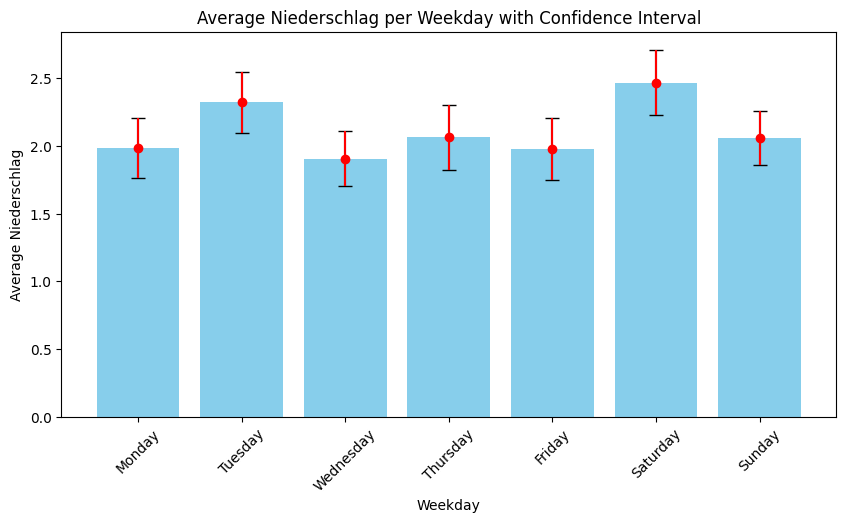

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the new dataset
#url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/6_weather_parameters-2.csv'
data = "/workspaces/bakery_sales_prediction/sourcedata/cleaned_data/7_transformed_variables.csv"

# Read the file and check it out
#df_weather = pd.read_csv(url)
df_weather = pd.read_csv(data)
df_weather.info()

# Print the columns to confirm the presence of 'Niederschlag'
print(df_weather.columns)

# Convert 'Datum' column to datetime format
df_weather['Datum'] = pd.to_datetime(df_weather['Datum'])

# Extract weekday from 'Datum' column
df_weather['weekday'] = df_weather['Datum'].dt.weekday

# Calculate average 'Niederschlag' per weekday if the column exists
if 'Niederschlag' in df_weather.columns:
    avg_niederschlag_per_weekday = df_weather.groupby('weekday')['Niederschlag'].mean()

    # Sort weekdays from Monday to Sunday
    avg_niederschlag_per_weekday = avg_niederschlag_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])

    # Calculate confidence interval
    ci = 1.96 * df_weather.groupby('weekday')['Niederschlag'].std() / np.sqrt(df_weather.groupby('weekday')['Niederschlag'].count())

    # Plot bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(avg_niederschlag_per_weekday.index, avg_niederschlag_per_weekday.values, yerr=ci, capsize=5, color='skyblue')
    plt.errorbar(avg_niederschlag_per_weekday.index, avg_niederschlag_per_weekday.values, yerr=ci, fmt='o', color='red')
    plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
    plt.xlabel('Weekday')
    plt.ylabel('Average Niederschlag')
    plt.title('Average Niederschlag per Weekday with Confidence Interval')
    plt.show()
else:
    print("The column 'Niederschlag' does not exist in the dataset.")


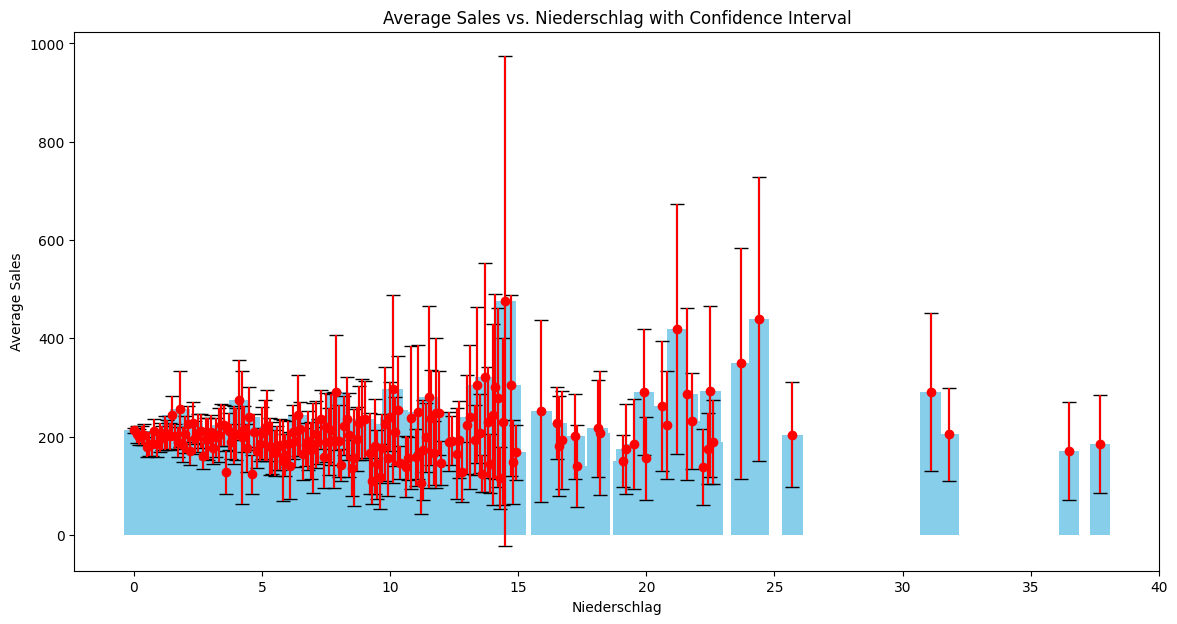

In [ ]:
# Convert 'Datum' column to datetime format
df_weather['Datum'] = pd.to_datetime(df_weather['Datum'])

# Group by 'Niederschlag' and calculate average sales ('Umsatz')
avg_sales_per_niederschlag = df_weather.groupby('Niederschlag')['Umsatz'].mean()

# Calculate confidence intervals
ci = 1.96 * df_weather.groupby('Niederschlag')['Umsatz'].std() / np.sqrt(df_weather.groupby('Niederschlag')['Umsatz'].count())

# Plot bar chart
plt.figure(figsize=(14, 7))
plt.bar(avg_sales_per_niederschlag.index, avg_sales_per_niederschlag.values, yerr=ci, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_niederschlag.index, avg_sales_per_niederschlag.values, yerr=ci, fmt='o', color='red')
plt.xlabel('Niederschlag')
plt.ylabel('Average Sales')
plt.title('Average Sales vs. Niederschlag with Confidence Interval')
plt.show()


### **3.1 - Creation of a bar chart for feature "Summer"**

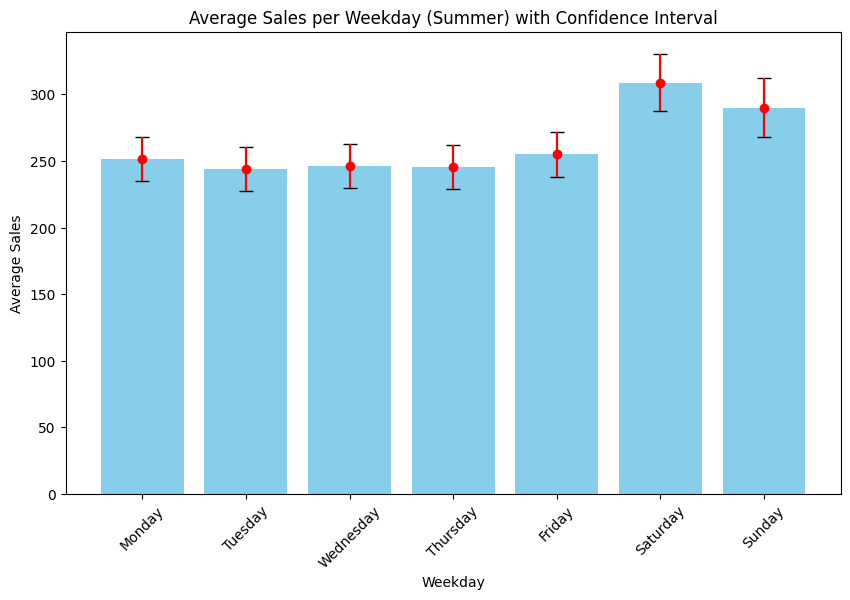

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the new dataset
#url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/6_weather_parameters-2.csv'
data = "/workspaces/bakery_sales_prediction/sourcedata/cleaned_data/7_transformed_variables.csv"

#df_weather = pd.read_csv(url)
df_weather = pd.read_csv(data)

# Convert 'Datum' column to datetime format
df_weather['Datum'] = pd.to_datetime(df_weather['Datum'])

# Filter the data for the 'summer' season
df_summer = df_weather[df_weather['season'] == 2].copy() # (1=spring, 2=summer, 3=autumn, 4=winter)

# Extract weekday from 'Datum' column
df_summer.loc[:, 'weekday'] = df_summer['Datum'].dt.weekday

# Calculate average sales ('Umsatz') per weekday
avg_sales_per_weekday = df_summer.groupby('weekday')['Umsatz'].mean()

# Calculate confidence intervals for average sales
ci_sales = 1.96 * df_summer.groupby('weekday')['Umsatz'].std() / np.sqrt(df_summer.groupby('weekday')['Umsatz'].count())

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])
ci_sales = ci_sales.reindex([0, 1, 2, 3, 4, 5, 6])

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci_sales, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci_sales, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
plt.title('Average Sales per Weekday (Summer) with Confidence Interval')
plt.show()


### **3.2 - Creation of a bar chart for feature "Autumn"**

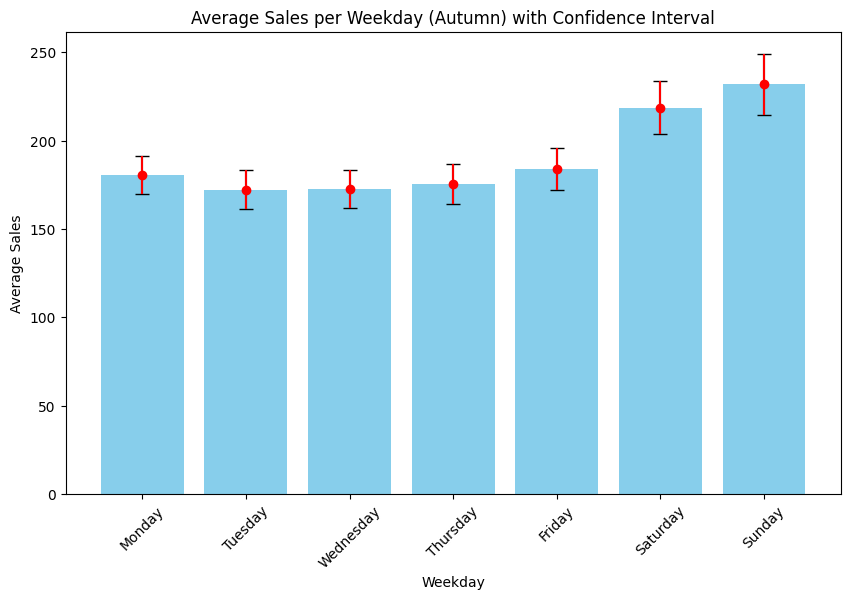

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the new dataset
#url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/6_weather_parameters-2.csv'
data = "/workspaces/bakery_sales_prediction/sourcedata/cleaned_data/7_transformed_variables.csv"

#df_weather = pd.read_csv(url)
df_weather = pd.read_csv(data)

# Convert 'Datum' column to datetime format
df_weather['Datum'] = pd.to_datetime(df_weather['Datum'])

# Filter the data for the 'summer' season
df_autumn = df_weather[df_weather['season'] == 3].copy()

# Extract weekday from 'Datum' column
df_autumn.loc[:, 'weekday'] = df_autumn['Datum'].dt.weekday

# Calculate average sales ('Umsatz') per weekday
avg_sales_per_weekday = df_autumn.groupby('weekday')['Umsatz'].mean()

# Calculate confidence intervals for average sales
ci_sales = 1.96 * df_autumn.groupby('weekday')['Umsatz'].std() / np.sqrt(df_autumn.groupby('weekday')['Umsatz'].count())

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])
ci_sales = ci_sales.reindex([0, 1, 2, 3, 4, 5, 6])

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci_sales, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci_sales, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
plt.title('Average Sales per Weekday (Autumn) with Confidence Interval')
plt.show()


### **3.3 - Creation of a bar chart for feature "Winter"**

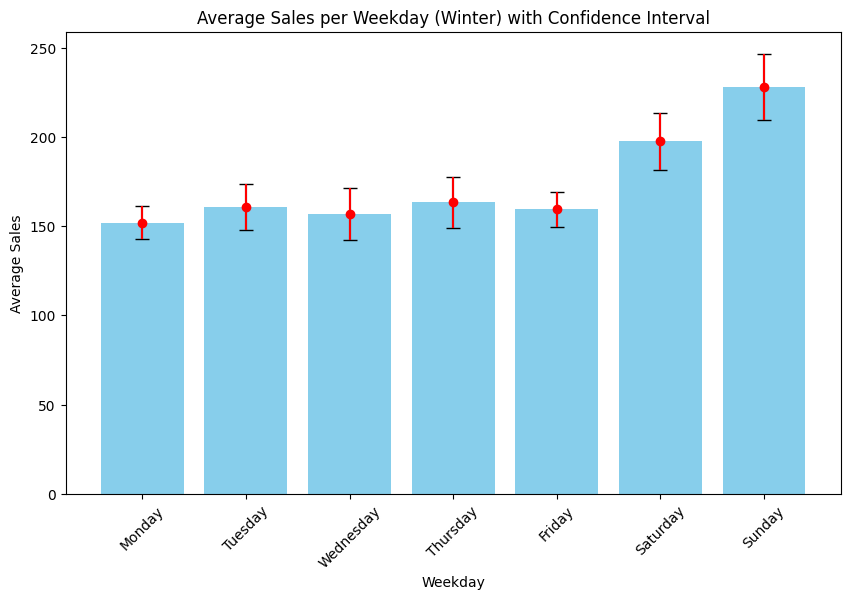

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the new dataset
#url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/6_weather_parameters-2.csv'
data = "/workspaces/bakery_sales_prediction/sourcedata/cleaned_data/7_transformed_variables.csv"

#df_weather = pd.read_csv(url)
df_weather = pd.read_csv(data)

# Convert 'Datum' column to datetime format
df_weather['Datum'] = pd.to_datetime(df_weather['Datum'])

# Filter the data for the 'summer' season
df_winter = df_weather[df_weather['season'] == 4].copy()

# Extract weekday from 'Datum' column
df_winter.loc[:, 'weekday'] = df_winter['Datum'].dt.weekday

# Calculate average sales ('Umsatz') per weekday
avg_sales_per_weekday = df_winter.groupby('weekday')['Umsatz'].mean()

# Calculate confidence intervals for average sales
ci_sales = 1.96 * df_winter.groupby('weekday')['Umsatz'].std() / np.sqrt(df_winter.groupby('weekday')['Umsatz'].count())

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])
ci_sales = ci_sales.reindex([0, 1, 2, 3, 4, 5, 6])

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci_sales, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci_sales, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
plt.title('Average Sales per Weekday (Winter) with Confidence Interval')
plt.show()


### **3.4 - Creation of a bar chart for feature "Spring"**

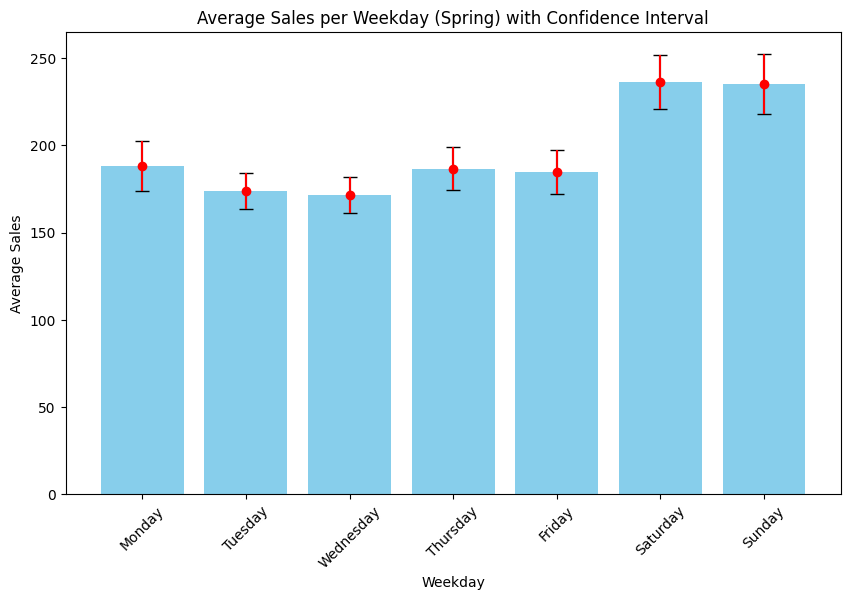

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/6_weather_parameters-2.csv'
data = "/workspaces/bakery_sales_prediction/sourcedata/cleaned_data/7_transformed_variables.csv"

#df_weather = pd.read_csv(url)
df_weather = pd.read_csv(data)

# Convert 'Datum' column to datetime format
df_weather['Datum'] = pd.to_datetime(df_weather['Datum'])

# Filter the data for the 'summer' season
df_spring = df_weather[df_weather['season'] == 1].copy()

# Extract weekday from 'Datum' column
df_spring.loc[:, 'weekday'] = df_spring['Datum'].dt.weekday

# Calculate average sales ('Umsatz') per weekday
avg_sales_per_weekday = df_spring.groupby('weekday')['Umsatz'].mean()

# Calculate confidence intervals for average sales
ci_sales = 1.96 * df_spring.groupby('weekday')['Umsatz'].std() / np.sqrt(df_spring.groupby('weekday')['Umsatz'].count())

# Sort weekdays from Monday to Sunday
avg_sales_per_weekday = avg_sales_per_weekday.reindex([0, 1, 2, 3, 4, 5, 6])
ci_sales = ci_sales.reindex([0, 1, 2, 3, 4, 5, 6])

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci_sales, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_weekday.index, avg_sales_per_weekday.values, yerr=ci_sales, fmt='o', color='red')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.xlabel('Weekday')
plt.ylabel('Average Sales')
plt.title('Average Sales per Weekday (Spring) with Confidence Interval')
plt.show()


### **4. - Temperature deviation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#url = 'https://raw.githubusercontent.com/BossyNine/bakery_sales_prediction/main/sourcedata/cleaned_data/6_weather_parameters-2.csv'
data = "/workspaces/bakery_sales_prediction/sourcedata/cleaned_data/7_transformed_variables.csv"

#df_weather = pd.read_csv(url)
df_weather = pd.read_csv(data)

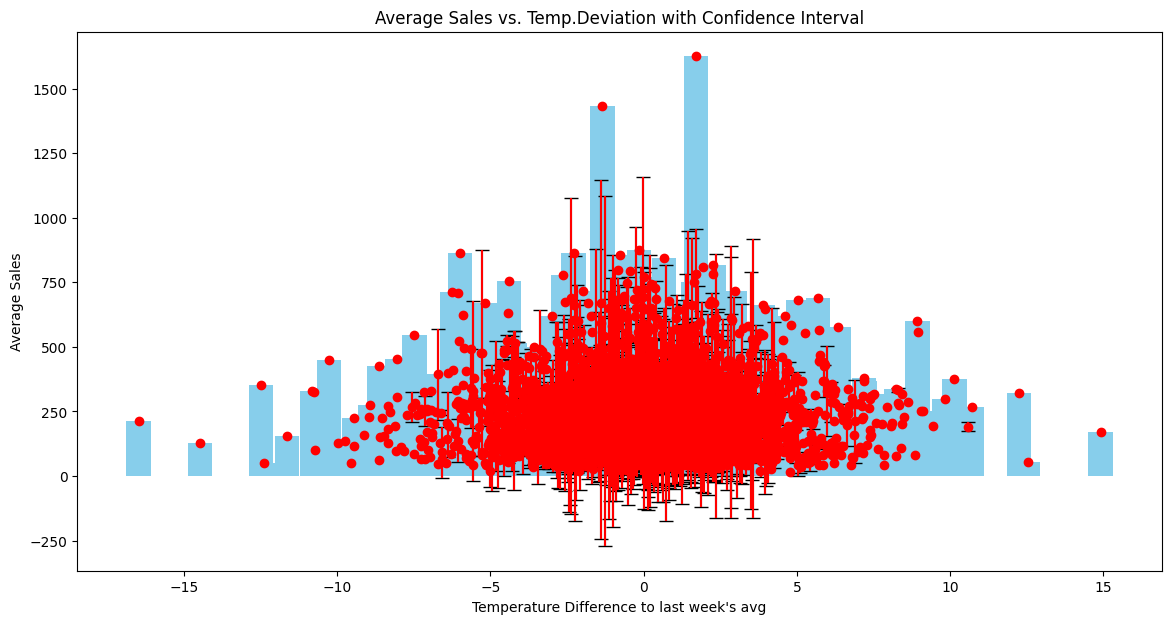

In [ ]:
# Convert 'Datum' column to datetime format
df_weather['Datum'] = pd.to_datetime(df_weather['Datum'])

# Group by 'Niederschlag' and calculate average sales ('Umsatz')
avg_sales_per_niederschlag = df_weather.groupby('temp_diff_next_day')['Umsatz'].mean()

# Calculate confidence intervals
ci = 1.96 * df_weather.groupby('temp_diff_next_day')['Umsatz'].std() / np.sqrt(df_weather.groupby('temp_diff_next_day')['Umsatz'].count())

# Plot bar chart
plt.figure(figsize=(14, 7))
plt.bar(avg_sales_per_niederschlag.index, avg_sales_per_niederschlag.values, yerr=ci, capsize=5, color='skyblue')
plt.errorbar(avg_sales_per_niederschlag.index, avg_sales_per_niederschlag.values, yerr=ci, fmt='o', color='red')
plt.xlabel("Temperature Difference to last week's avg")
plt.ylabel('Average Sales')
plt.title('Average Sales vs. Temp.Deviation with Confidence Interval')
plt.show()